In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sys import exit
plt.close('all')

In [4]:
# load in data 
genre = 'house'
year_max = '2016'

df = pd.read_pickle('data/'+genre+'_'+year_max)
df_features = pd.read_pickle('data/'+genre+'_features_'+year_max)

In [5]:
# initiate array
res = []

# parse objects
for i in range(1980,np.int_(year_max)+1):
    # limit each year to 100 songs, so that each bin has roughly same statistics
    a = df[df['release_year'].astype(int) == i][0:100]
    b = df_features[df['release_year'].astype(int) == i][0:100]
    
    # parse data. popularity is normalized to 0 - 1.
    popu = np.median(a['popularity']/100.)
    temp = np.median(b['tempo'])
    loud = np.median(b['loudness'])
    dance = np.median(b['danceability'])
    inst = np.median(b['instrumentalness'])
    val = np.median(b['valence'])
    
    popu_std = np.std(a['popularity']/100.)
    temp_std = np.std(b['tempo'])
    loud_std = np.std(b['loudness'])
    dance_std = np.std(b['danceability'])
    inst_std = np.std(b['instrumentalness'])
    val_std = np.std(b['valence'])
    
    res.append({'popu':popu, 'temp':temp, 'loud':loud, 'dance':dance, 'inst':inst, 'val':val, 'popu_std':popu_std, 'temp_std':temp_std, 'loud_std':loud_std, 'dance_std':dance_std, 'inst_std':inst_std, 'val_std':val_std})
        
# save to dataframe
result = pd.DataFrame(res)

In [6]:
# option to save 
#result.to_pickle('data/'+genre+'_stats')

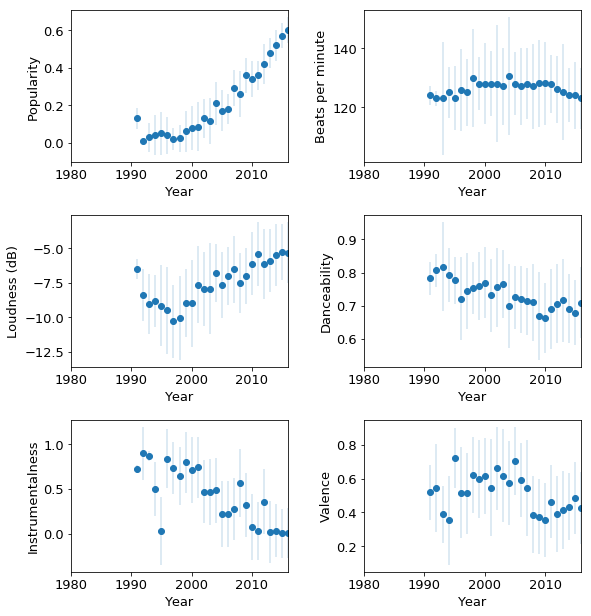

In [11]:
# now plot the results!
# we're building a six panel plot showing the median/std deviations of 
# popularity, beats per minute, loudness, 'danceability', instrumentalness, and valence 
# in the time frame 1980-2016.

# set up xaxis
xaxis = np.arange(1980,np.int_(year_max)+1,1)

# set up plot windows
fig = plt.figure(figsize=(10.5,12))
font = {'size':13}
plt.rc('font', **font)

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.875, top=0.85, wspace=0.35, hspace=0.35)

# transparency of the standard deviations
alpha = 0.2
xmin, xmax = 1980,2016

plt.subplot(321)
plt.scatter(xaxis,result['popu'])
plt.errorbar(xaxis,result['popu'],yerr=result['popu_std'],fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([xmin, xmax])
plt.ylabel('Popularity')

plt.subplot(322)
plt.scatter(xaxis,result['temp'])
plt.errorbar(xaxis,result['temp'],yerr=result['temp_std'],fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([xmin, xmax])
plt.ylabel('Beats per minute')

plt.subplot(323)
plt.scatter(xaxis,result['loud'])
plt.errorbar(xaxis,result['loud'],yerr=result['loud_std'],fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([xmin, xmax])
plt.ylabel('Loudness (dB)')

plt.subplot(324)
plt.scatter(xaxis,result['dance'])
plt.errorbar(xaxis,result['dance'],yerr=result['dance_std'],fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([xmin, xmax])
plt.ylabel('Danceability')

plt.subplot(325)
plt.scatter(xaxis,result['inst'])
plt.errorbar(xaxis,result['inst'],yerr=result['inst_std'],fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([xmin, xmax])
plt.ylabel('Instrumentalness')

plt.subplot(326)
plt.scatter(xaxis,result['val'])
plt.errorbar(xaxis,result['val'],yerr=result['val_std'],fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([xmin, xmax])
plt.ylabel('Valence')

plt.show()
#plt.savefig('output/'+genre+'_evolution.pdf', dpi=150, bbox_inches='tight', pad_inches=0.2)